In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("cardekho_dataset.csv")

In [3]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
# drop index column

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [23]:
df.shape

(15411, 13)

In [19]:
df.duplicated().sum()

167

In [ ]:
# sperating the target column and checking for the duplicated value in the remaining input features.

In [25]:
feature_cols = df.drop(columns=['selling_price'])
feature_dup_count = df.duplicated(subset=feature_cols).sum()
feature_dup_count

1416

In [21]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [27]:
# Clean numeric columns stored as strings

In [29]:
df['engine'] = df['engine'].astype(str).str.extract(r'(\d+)').astype(float)
df['max_power'] = df['max_power'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

In [32]:
# Dropping car_name column

In [34]:
df.drop(columns=['car_name'], inplace=True)
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000


## Heatmap

<Axes: >

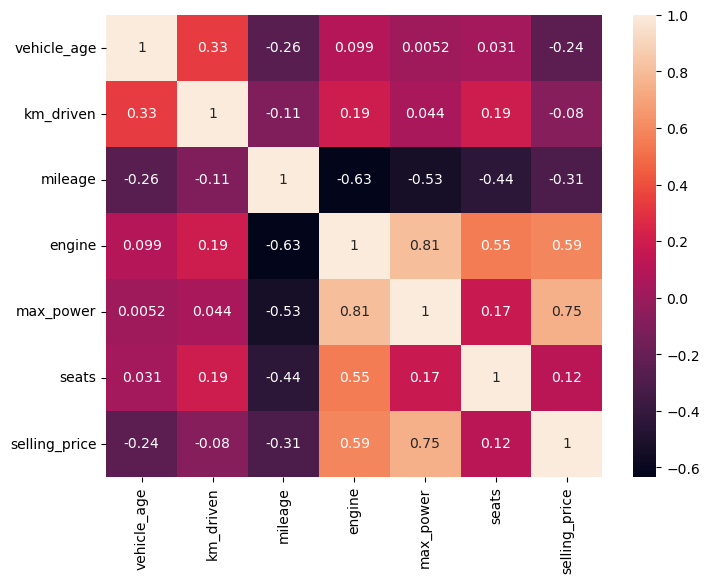

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True) ,annot=True)

## Feature Engineering 

In [38]:
# Car age bucket

In [40]:
bins = [0, 2, 5, 10, df['vehicle_age'].max()]
labels = ['0-2', '3-5', '6-10', '10+']

df['car_age_bucket'] = pd.cut(df['vehicle_age'], bins=bins, labels=labels, include_lowest=True)

<Axes: xlabel='selling_price', ylabel='Count'>

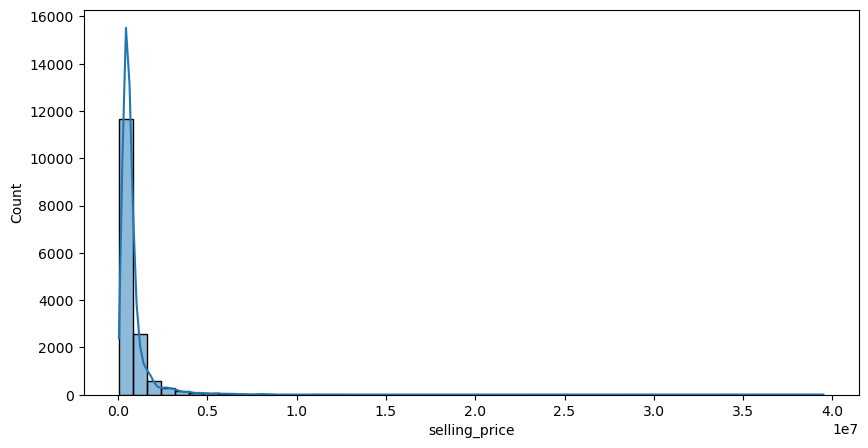

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(df['selling_price'] , kde=True , bins=50)

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

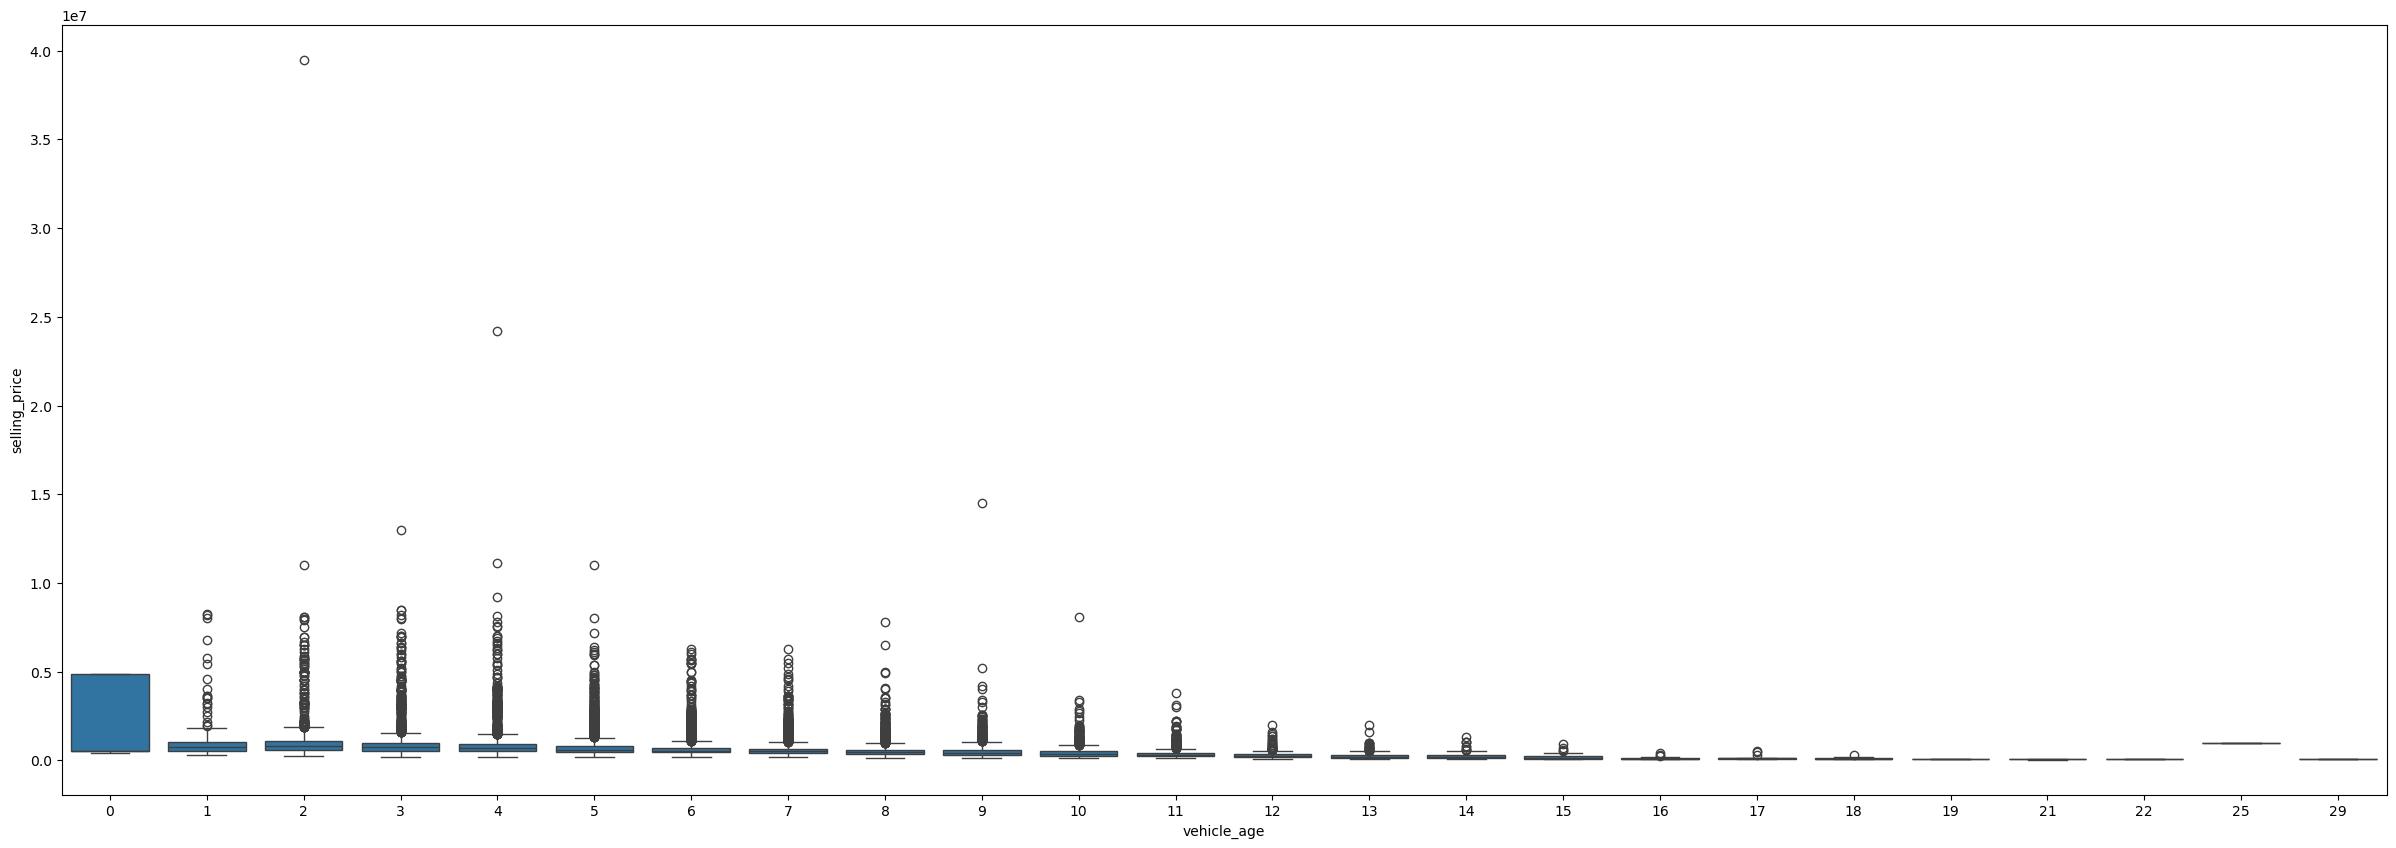

In [63]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df , x='vehicle_age' , y='selling_price')

<Axes: xlabel='engine', ylabel='selling_price'>

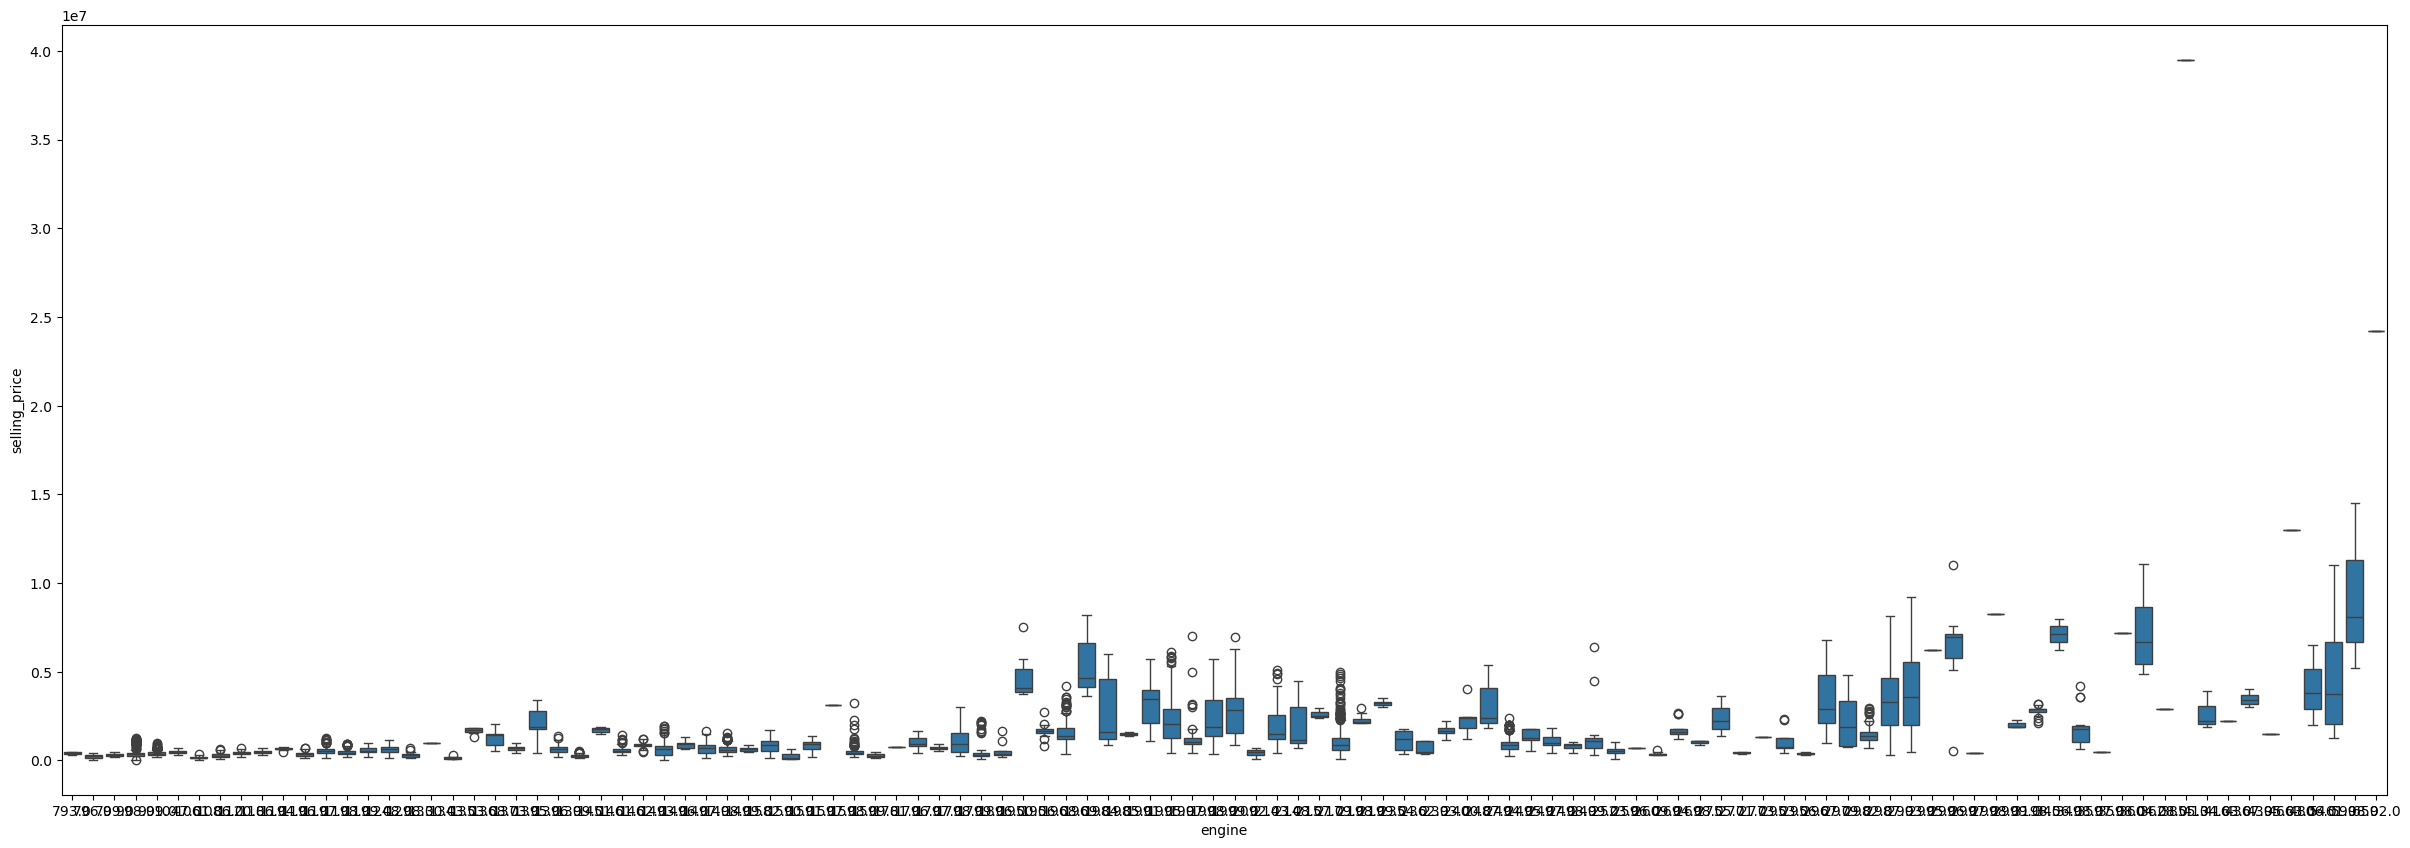

In [66]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df , x='engine' , y='selling_price')

In [ ]:
# Engine bucket

In [44]:
bins = [0, 1200, 2000, df['engine'].max()]
labels = ['small', 'medium', 'large']

df['engine_bucket'] = pd.cut(df['engine'], bins=bins, labels=labels)

<Axes: xlabel='engine_bucket', ylabel='selling_price'>

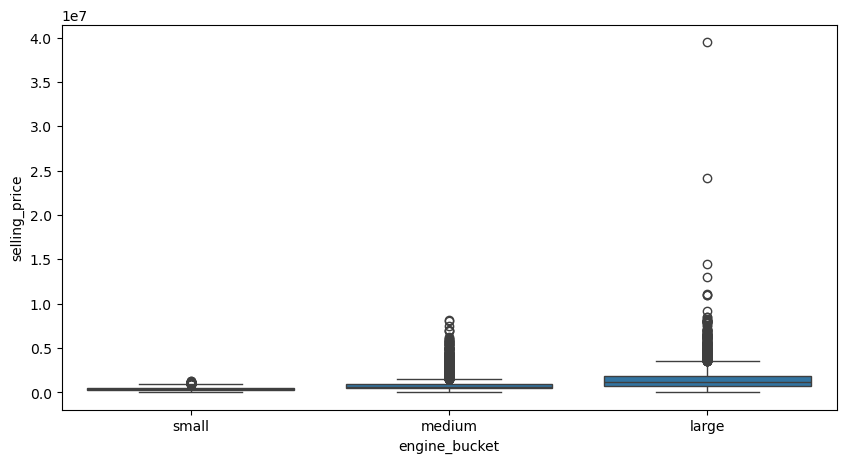

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df , x='engine_bucket' , y='selling_price')

In [46]:
# Max power bucket

In [72]:
bins = [0 , 75 , 150 , df['max_power'].max()]
labels = ['Low_power / City cars' , 'Mid_power/regular sedans / SUVs' , 'high_power / premium / performance cars']

df['max_power_bucket'] = pd.cut(df['max_power'] , labels=labels , bins=bins)

<Axes: xlabel='max_power_bucket', ylabel='selling_price'>

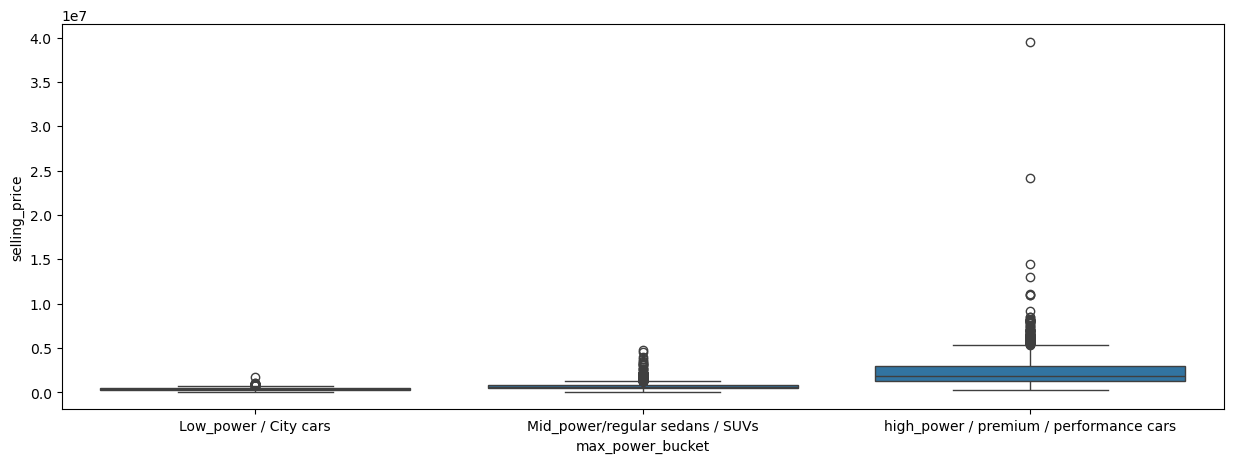

In [80]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df , x='max_power_bucket' , y='selling_price')

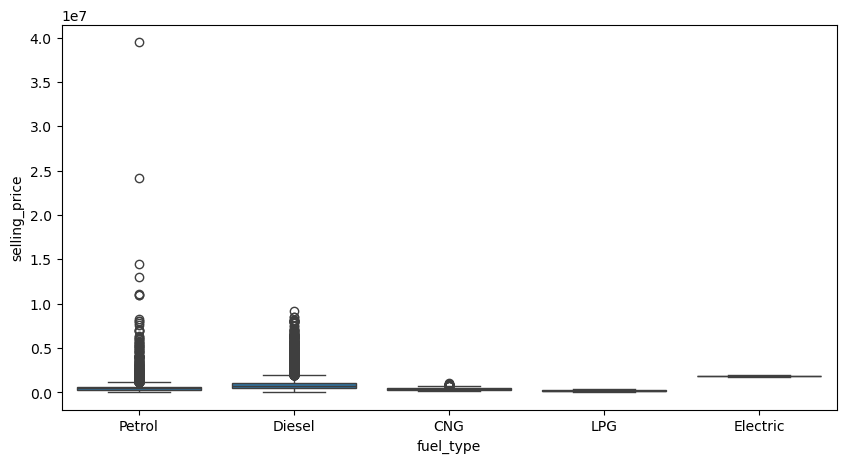

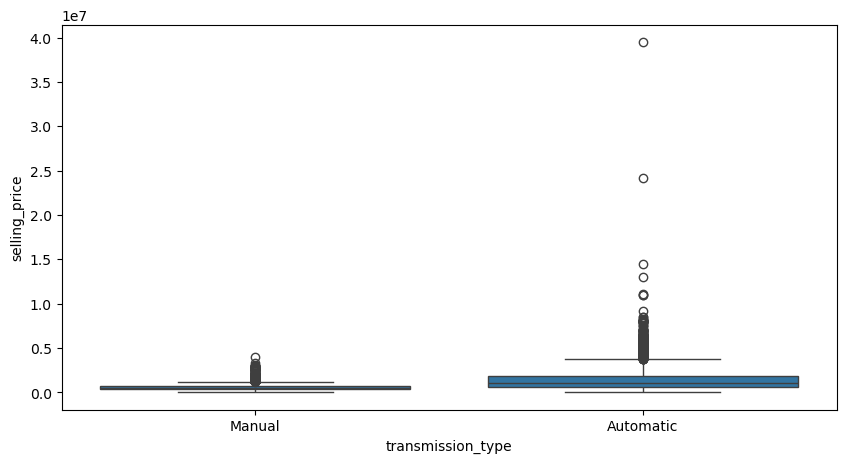

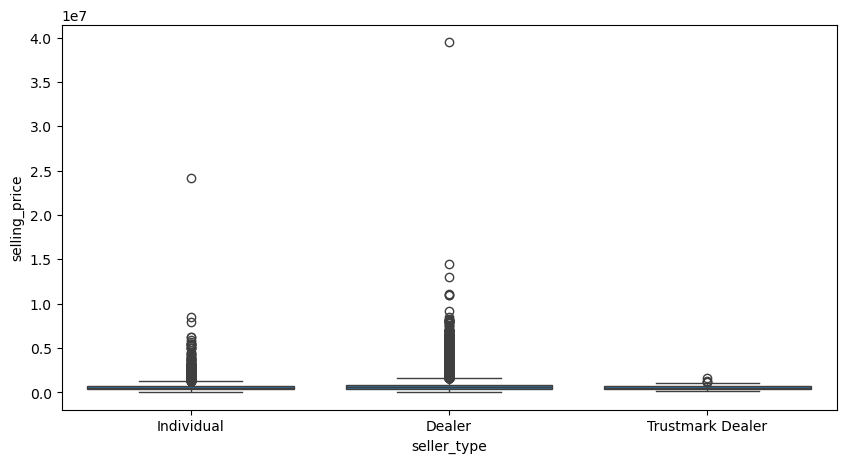

In [85]:
columns = ['fuel_type', 'transmission_type' , 'seller_type']

for i in columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df , x=i , y='selling_price')
    plt.show

## Target Transformation

In [89]:
df['selling_price_log'] = np.log1p(df['selling_price'])

<Axes: xlabel='selling_price_log', ylabel='Count'>

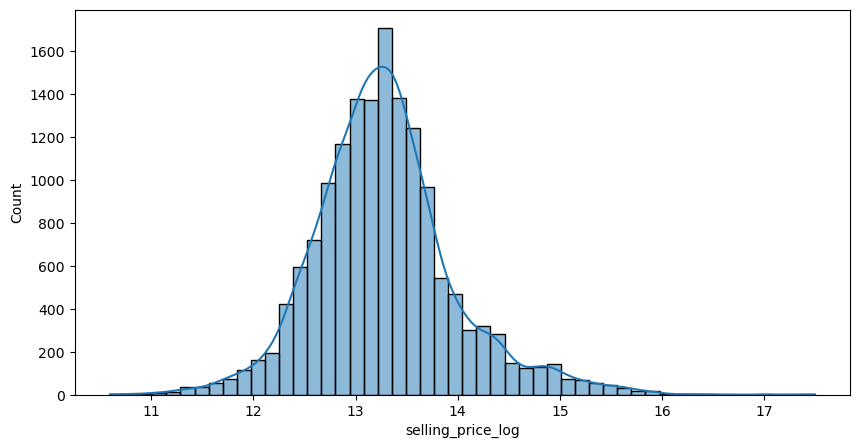

In [91]:
plt.figure(figsize=(10,5))
sns.histplot(df['selling_price_log'] , kde=True , bins=50)

## Feature Selection (Baseline)

In [95]:
X = df[['brand','vehicle_age','km_driven','mileage','engine','max_power','fuel_type','transmission_type','seller_type']]
y = df['selling_price_log']

In [97]:
X_encoded = pd.get_dummies(X,columns=['brand', 'fuel_type', 'transmission_type', 'seller_type'],drop_first=True)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [101]:
num_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Linear Regression

In [123]:
lr = LinearRegression()
lr

LinearRegression()

In [125]:
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)

In [195]:
lr_r2 = r2_score(y_test , y_pred)
lr_r2

0.8914447186761981

In [197]:
lr_rmse = np.sqrt(mean_squared_error(y_test , y_pred))
lr_rmse

0.2328927651089376

## Ridge and Lasso

In [135]:
ridge = Ridge(alpha=1.0)
ridge

Ridge()

In [137]:
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [139]:
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_r2

0.8916045049553777

In [141]:
rmse_ridge = np.sqrt(mean_squared_error(y_test , ridge_pred))
rmse_ridge

0.23272130052509044

In [144]:
lasso = Lasso(alpha=0.001)
lasso

Lasso(alpha=0.001)

In [146]:
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [152]:
lasso_r2 = r2_score(y_test , y_pred_lasso)
lasso_r2

0.8838150580905508

In [156]:
lasso_rmse = np.sqrt(mean_squared_error(y_test , y_pred_lasso))
lasso_rmse

0.24093807781379425

## Random Forest

In [160]:
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [164]:
rf.fit(X_train , y_train)
ran_pred = rf.predict(X_test)

In [166]:
rf_r2 = r2_score(y_test , ran_pred)
rf_r2

0.933577578440726

In [168]:
rf_rmse = np.sqrt(mean_squared_error(y_test , ran_pred))
rf_rmse

0.18217461943887203

## Feature Importance (Numeric Only)

In [174]:
num_cols_rf = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']

In [176]:
rf_num = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf_num.fit(X_train[num_cols_rf], y_train)

importances = pd.Series(rf_num.feature_importances_, index=num_cols_rf).sort_values(ascending=False)
importances

max_power      0.652124
vehicle_age    0.222447
engine         0.056964
km_driven      0.039600
mileage        0.028865
dtype: float64

## Updating Features

In [180]:
X_Update = df[['brand', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_type', 
               'transmission_type', 'seller_type', 'car_age_bucket', 'max_power_bucket']]

In [184]:
X_Update_encoded = pd.get_dummies(X_Update, drop_first=True)

In [186]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_Update_encoded, y, test_size=0.2, random_state=42)

In [191]:
rf_updated = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf_updated

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [193]:
rf_updated.fit(X_train_f, y_train_f)
random_pred = rf_updated.predict(X_test_f)

In [201]:
r2 = r2_score(y_test_f, random_pred)
r2

0.9335312546598059

In [205]:
random_rmse = np.sqrt(mean_squared_error(y_test_f, random_pred))
random_rmse

0.18223813373199255

## Cross-Validation

In [209]:
cv_scores = cross_val_score(rf_updated, X_Update_encoded, y, cv=5, scoring='r2')

print(cv_scores)
print(cv_scores.mean())

[0.93515556 0.91644041 0.91639105 0.94171896 0.92122315]
0.9261858245356528


## Hyperparameter Tuning

In [215]:
param_grid = {'n_estimators' : [200 , 300] , 'max_depth' : [None , 15,25] , 'min_samples_leaf' : [1,3,5]}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid = GridSearchCV(rf , param_grid , cv= 5 , scoring= 'r2' , n_jobs=-1)
grid.fit(X_Update_encoded , y)
grid.best_params_ , grid.best_score_

({'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 300},
 0.9297006521639037)

## Saving the trained model

In [220]:
import joblib

joblib.dump(rf_updated, "car_price_model.joblib")

['car_price_model.joblib']

In [225]:
joblib.dump(X_Update_encoded.columns, "model_features.joblib")

['model_features.joblib']